In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

# Set the UniswapV3 API endpoint
api_endpoint = "https://api.thegraph.com/subgraphs/name/uniswap/uniswap-v3"

# Define the pool address
pool_address = "0x8ad599c3a0ff1de082011efddc58f1908eb6e6d8"

In [2]:
start_date = "2023-01-01T00:00:00Z"
end_date = "2023-02-01T00:00:00Z"

In [13]:
import datetime

# Create a datetime object for January 1st, 2023 at 00:00:00
dt = datetime.datetime(2023, 1, 1, 0, 0, 0)

# Convert the datetime object to a Unix timestamp
unix_timestamp = dt.timestamp()

print(unix_timestamp)

1672531200.0


In [14]:
query = """
    query {
        pool(id: "0x8ad599c3a0ff1de082011efddc58f1908eb6e6d8") {
            id
            token0 {
                symbol
            }
            token1 {
                symbol
            }
            poolDayData(where: { date_gte: 1609459200, date_lt: 1672531200}, orderBy: date, orderDirection: asc) {
                date
                liquidity
                volumeUSD
            }
        }
    }
"""

In [25]:
query = """
    query {
        pool(id: "0x8ad599c3a0ff1de082011efddc58f1908eb6e6d8") {
            id
            token0 {
                symbol
            }
            token1 {
                symbol
            }
            poolDayData(first: 1000, orderBy: date, orderDirection: asc) {
                date
                liquidity
                volumeUSD
                feesUSD
            }
        }
    }
"""

In [26]:
# Send the query to the API endpoint
response = requests.post(api_endpoint, json={'query': query})

# Parse the JSON response into a Pandas DataFrame
data = response.json()['data']['pool']['poolDayData']
df = pd.DataFrame(data)

In [27]:
df

,date,liquidity,volumeUSD,feesUSD
0,1620086400,0,0,0
1,1620172800,575252122972611853,2285046.965667814199635098139460355,6855.140897003442598905294418381059
2,1620259200,4279909271094094376,44244152.67787542252999919349273893,132732.4580336262675899975804782162
3,1620345600,7001203448949060276,46760038.97683729271605282426090377,140280.1169305118781481584727827113
4,1620432000,2859338719003997565,55140845.63832031034967048954949849,165422.5369149609310490114686484951
...,...,...,...,...
724,1682640000,7365587467589615296,7228088.089207720376338250356776469,21684.26426762316112901475107032941
725,1682726400,5118329759048463657,3733410.316040927300509250033059306,11200.23094812278190152775009917792
726,1682812800,7279102075318241452,9371884.813540433213459162283105513,28115.65444062129964037748684931656
727,1682899200,7220734490109797848,14140425.95513897076379369564524961,42421.27786541691229138108693574879


In [28]:
# Convert the date column to a datetime object and set it as the index
df['date'] = pd.to_datetime(df['date'], unit='s')
df.set_index('date', inplace=True)

In [29]:
df['volumeUSD'] = pd.to_numeric(df["volumeUSD"])
df['feesUSD'] = pd.to_numeric(df["feesUSD"])

#df['liquidity'] = pd.to_numeric(df['liquidity'])


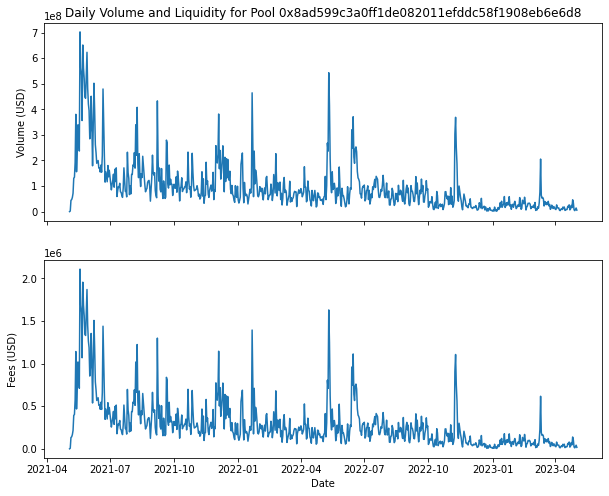

In [30]:
# Plot the daily volume over time

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(10, 8))

# Plot the daily volume over time
ax1.plot(df.index, df['volumeUSD'])
ax1.set_ylabel("Volume (USD)")
ax1.set_title("Daily Volume and Liquidity for Pool {}".format(pool_address))

# Plot the liquidity over time
ax2.plot(df.index, df['feesUSD'])
ax2.set_ylabel("Fees (USD)")
ax2.set_xlabel("Date")

# Display the plot
plt.show()

